# Agora Forum

In [41]:
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import re
from ForumParsingTools import *
import glob
import seaborn as sns
import plotly.express as px
import descartes
from ast import literal_eval as make_tuple


In [42]:
# Used to truncate dates from input file
def cut(s):
    
    return s[:-1]
cut_v = np.vectorize(cut)

In [43]:
directory = "../data/agora-forums/"
with open('../data/agora_forum_days.out') as f:
    dates = f.readlines()
# List of dates with data available
dates = cut_v(dates)
forumDF = pd.read_csv('../saved_gen_df/forum_stats_df.csv')

PENDANT TOUTE UNE PERIODE, PAS DE STAT PARCE QUE PAS LOGGED IN, INFÉRER EN UTLISANT LES AUTRES DONNÉES 


In [44]:
# Create a feature to store "new posts since last snapshot"
new_posts = pd.Series(np.zeros(len(forumDF['date'])))
forumDF['date'] = forumDF['date'].apply(pd.to_datetime)

In [45]:
# To store days between snapshot
days_elapsed = pd.Series(np.zeros(len(forumDF['date'])))

old_val = 0
old_date = forumDF['date'][0]
for i in range(len(new_posts)):
    diff = (forumDF['date'][i] - old_date).days
    if(diff) == 0:
        diff = 1
    new_posts[i] = (forumDF['posts'][i] - old_val)
    days_elapsed[i] = diff
    old_val = forumDF['posts'][i]
    old_date = forumDF['date'][i]
    
forumDF['new_posts'] = new_posts
forumDF['days_elapsed'] = days_elapsed

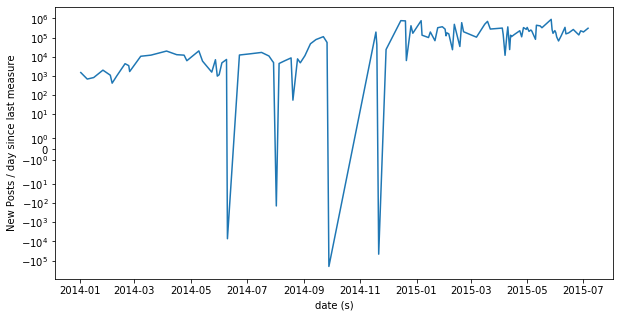

In [46]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Posts / day since last measure')
ax1.plot(forumDF['date'], forumDF['new_posts'])
ax1.tick_params(axis='y')

plt.yscale('symlog')
plt.show()

In [47]:
# Do the same for members
old_val = 0
old_date = forumDF['date'][0]

for i in range(len(new_posts)):
    diff = (forumDF['date'][i] - old_date).days
    if(diff) == 0:
        diff = 1
    new_posts[i] = (forumDF['members'][i] - old_val)
    old_val = forumDF['members'][i]
    old_date = forumDF['date'][i]

forumDF['new_members'] = new_posts

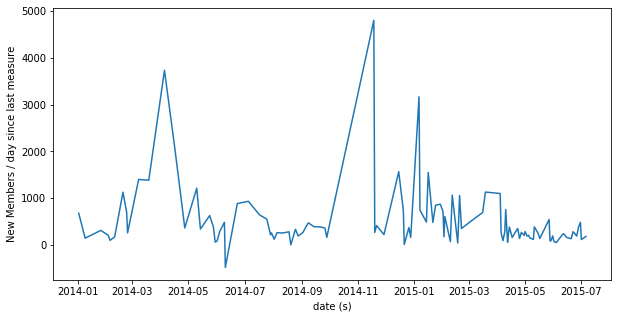

In [48]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Members / day since last measure')
ax1.plot(forumDF['date'], forumDF['new_members'])
ax1.tick_params(axis='y')

plt.show()

In [49]:
old_val = 0
old_date = forumDF['date'][0]
# Do the same for topics
for i in range(len(new_posts)):
    diff = (forumDF['date'][i] - old_date).days
    if(diff) == 0:
        diff = 1
    new_posts[i] = (forumDF['topics'][i] - old_val)
    old_val = forumDF['topics'][i]
    old_date = forumDF['date'][i]

forumDF['new_topics'] = new_posts

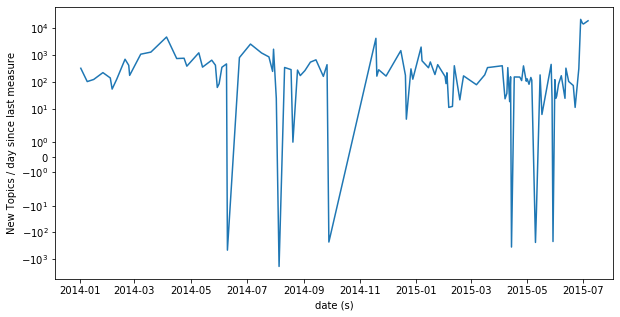

In [50]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Topics / day since last measure')
ax1.plot(forumDF['date'], forumDF['new_topics'])
plt.yscale('symlog')

plt.show()

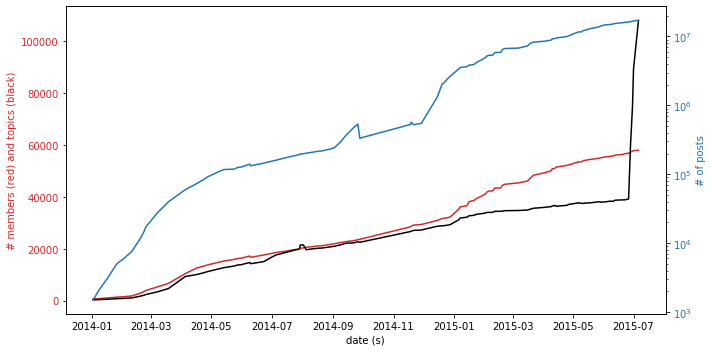

In [51]:
# Plot the number of members (red), of topics (black) and of posts (blue) over time
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('date (s)')
ax1.set_ylabel('# members (red) and topics (black)', color=color)
ax1.plot(forumDF['date'], forumDF['members'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(forumDF['date'], forumDF['topics'], color='black')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('# of posts', color=color)  # we already handled the x-label with ax1
ax2.plot(forumDF['date'], forumDF['posts'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [52]:
forumDF[forumDF['new_posts'] < 0]
# SHow that posts were removed on those particular days

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,members,posts,topics,nOnline,date,new_posts,days_elapsed,new_members,new_topics
24,24,24,24,16716,132894,14246,5,2014-06-10,-7243.0,1.0,-482.0,-460.0
31,31,31,31,20317,198093,21485,5,2014-08-02,-142.0,3.0,121.0,24.0
43,43,43,43,23664,334265,22495,5,2014-09-28,-201673.0,2.0,161.0,-229.0
46,46,46,46,29143,523840,27080,5,2014-11-21,-46268.0,2.0,414.0,279.0


In [53]:
forumDF[forumDF['new_members'] < 0]
# Show that members were removed this days precisely

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,members,posts,topics,nOnline,date,new_posts,days_elapsed,new_members,new_topics
24,24,24,24,16716,132894,14246,5,2014-06-10,-7243.0,1.0,-482.0,-460.0


In [54]:
forumDF[forumDF['new_topics'] < 0]
# Show that topics were removed on those particular days

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,members,posts,topics,nOnline,date,new_posts,days_elapsed,new_members,new_topics
24,24,24,24,16716,132894,14246,5,2014-06-10,-7243.0,1.0,-482.0,-460.0
32,32,32,32,20577,202565,19623,5,2014-08-05,4472.0,3.0,260.0,-1862.0
43,43,43,43,23664,334265,22495,5,2014-09-28,-201673.0,2.0,161.0,-229.0
80,80,80,80,51523,9510546,36372,5,2015-04-14,112282.0,1.0,382.0,-352.0
90,90,90,90,53589,11693038,37503,5,2015-05-10,81219.0,4.0,116.0,-237.0
91,91,91,91,53975,12132780,37485,5,2015-05-11,439742.0,1.0,386.0,-18.0
96,96,96,96,55084,14186943,37915,5,2015-05-29,167278.0,1.0,88.0,-219.0


In [55]:
forumDF.sort_values(by=('date'))[40:50]
# Show values around the Onymous event

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,members,posts,topics,nOnline,date,new_posts,days_elapsed,new_members,new_topics
40,40,40,40,22763,368152,22135,5,2014-09-14,78984.0,6.0,390.0,654.0
41,41,41,41,23145,479990,22293,5,2014-09-22,111838.0,8.0,382.0,158.0
42,42,42,42,23503,535938,22724,5,2014-09-26,55948.0,4.0,358.0,431.0
43,43,43,43,23664,334265,22495,5,2014-09-28,-201673.0,2.0,161.0,-229.0
44,44,44,44,28464,528328,26640,5,2014-11-18,194063.0,51.0,4800.0,4145.0
45,45,45,45,28729,570108,26801,5,2014-11-19,41780.0,1.0,265.0,161.0
46,46,46,46,29143,523840,27080,5,2014-11-21,-46268.0,2.0,414.0,279.0
47,47,47,47,29363,547801,27242,5,2014-11-29,23961.0,8.0,220.0,162.0
48,48,48,48,30927,1311793,28683,5,2014-12-15,763992.0,16.0,1564.0,1441.0
49,49,49,49,31664,2054851,28856,5,2014-12-20,743058.0,5.0,737.0,173.0


In [56]:
forumDF.to_csv('../saved_gen_df/forum_stats_df.csv')

In [57]:
forumDF = pd.read_csv('../saved_gen_df/forumDF_full_df.csv')
forumDF = forumDF[['date', 'board', 'nReplies']]

In [58]:
forum_stat = pd.read_csv('../saved_gen_df/forum_stats_df.csv')
forum_stat = forum_stat.set_index('date')

In [59]:
forumDF_totDate = forumDF.groupby(by=['date']).describe()
forumDF_board = forumDF.groupby(by=['date', 'board']).describe()

In [60]:
forumDF_totDate = forumDF_totDate.set_axis([f"{x}{y}" for x, y in forumDF_totDate.columns], axis=1, inplace=False)
forumDF_board = forumDF_board.set_axis([f"{x}{y}" for x, y in forumDF_board.columns], axis=1, inplace=False)

In [61]:
forumDF_board = forumDF_board.drop(columns=['nRepliesmean','nRepliesstd' ,'nRepliesmin' ,
                                            'nReplies25%' ,'nReplies50%' ,'nReplies75%' ,'nRepliesmax'])

In [62]:
forumDF_totDate = forumDF_totDate.drop(columns=['nRepliesmean','nRepliesstd' ,'nRepliesmin',
                                                'nReplies25%' ,'nReplies50%' ,'nReplies75%' ,'nRepliesmax'])

In [63]:
forum_stat.join(forumDF_totDate, how='inner')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,members,posts,topics,nOnline,new_posts,days_elapsed,new_members,new_topics,nRepliescount
date,,,,,,,,,,,,,
2014-01-02,0,0,0,0,678,1508,317,3,1508.0,1.0,678.0,317.0,317.0
2014-01-09,1,1,1,1,822,2198,418,3,690.0,7.0,144.0,101.0,419.0
2014-01-16,2,2,2,2,1034,3026,539,3,828.0,7.0,212.0,121.0,531.0
2014-01-26,3,3,3,3,1344,5039,757,3,2013.0,10.0,310.0,218.0,739.0
2014-02-03,4,4,4,4,1550,6137,895,3,1098.0,8.0,206.0,138.0,871.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-26,107,107,107,107,56841,16192657,39173,5,137528.0,4.0,188.0,309.0,9325.0
2015-06-28,108,108,108,108,57227,16417981,60302,5,225324.0,2.0,386.0,21129.0,8572.0
2015-06-30,109,109,109,109,57710,16625015,75172,5,207034.0,2.0,483.0,14870.0,6145.0


In [64]:
# Return a the first file found in list_ for number n
def getFirstFile(n, list_):
    res = ""
    for l in list_:
        if(l.find('board,'+str(n)+".") != -1):
            return l
    return res

# Returns one file per board in the given directory path
def getDailyBoardSample(path):
    filess = []
    list_ = os.listdir(path)
    cut = np.vectorize(cutt)(list_)
    for n in np.unique(cut):
        filess.append(getFirstFile(n, list_))
        
    return filess

# Gets the number of pages per board for every recorded board on a given date
def getBoardsPageNum(date):
    path = '../data/agora-forums/'+date+'/index.php/'
    files = getDailyBoardSample(path)
    res = dict()
    for f in files:
        with open(path+f) as fp:
            soup = bs(fp, features="html.parser")
            board = soup.find_all('body')[0].find_all('div', class_="navigate_section")
            if(len(soup.find_all('body'))>0):
                links = soup.find_all('body')[0].find_all('div', class_="pagelinks floatleft")
                if(len(links) == 0):
                    break
                nPage = links[0].find_all('a')
                if(len(nPage) == 0):
                    maxPage = 1
                else:
                    maxPage = nPage[len(nPage) -1].text
            else:
                print(entry.path)
            if(len(board[0].find_all('a'))>=3):
                (board0, board1) = (board[0].find_all('a')[1].text, board[0].find_all('a')[2].text)
            else:
                (board0, board1) = (None, None)
            res.update({(board0, board1) : maxPage})
    return res

In [65]:
# Return the board's two digits id
def cutt(s):
    return re.sub("[^0-9]", "", s[6:8])

cut_v = np.vectorize(cut)

#Get all the dates for which we have data
with open('../data/agora_forum_days.out') as f:
    dates = f.readlines()
    
dates = cut_v(dates)

In [66]:
# Fill a DataFrame with values for every board for every day
nPages_df = pd.DataFrame(columns=['board', 'nPages', 'date'])
for date in dates:
    res = getBoardsPageNum(date)
    res_df = pd.DataFrame(list(res.items()), columns=['board', 'nPages'])
    res_df['date'] = date
    nPages_df = nPages_df.append(res_df)


In [67]:
def estimateTopics(n):
    return (int(n)-1)*50 + 25

In [68]:
nPages_df['nTopics_est'] = nPages_df['nPages'].apply(estimateTopics)

In [69]:
nPages_df.date[0]

0    2014-01-02
0    2014-01-09
0    2014-01-16
0    2014-01-26
0    2014-02-03
        ...    
0    2015-06-26
0    2015-06-28
0    2015-06-30
0    2015-07-01
0    2015-07-06
Name: date, Length: 142, dtype: object

In [70]:
nPages_df[nPages_df['board'] == ('General Category', 'Security Discussion')]

,board,nPages,date,nTopics_est
2,"(General Category, Security Discussion)",8,2014-05-24,375
2,"(General Category, Security Discussion)",8,2014-05-28,375
2,"(General Category, Security Discussion)",8,2014-05-30,375
2,"(General Category, Security Discussion)",8,2014-06-01,375
2,"(General Category, Security Discussion)",8,2014-06-04,375
...,...,...,...,...
2,"(General Category, Security Discussion)",19,2015-06-26,925
2,"(General Category, Security Discussion)",19,2015-06-28,925
2,"(General Category, Security Discussion)",19,2015-06-30,925
2,"(General Category, Security Discussion)",19,2015-07-01,925


In [71]:
nPages_df['nPages'] = nPages_df['nPages'].astype(int)
nPages_df['board'] = nPages_df['board'].astype(str)
nPages_df['board'] = nPages_df['board'].apply(make_tuple)


FILL MISSING BOARDS WITH LAST VALUE OR 0 IF NOT LAST VALUE

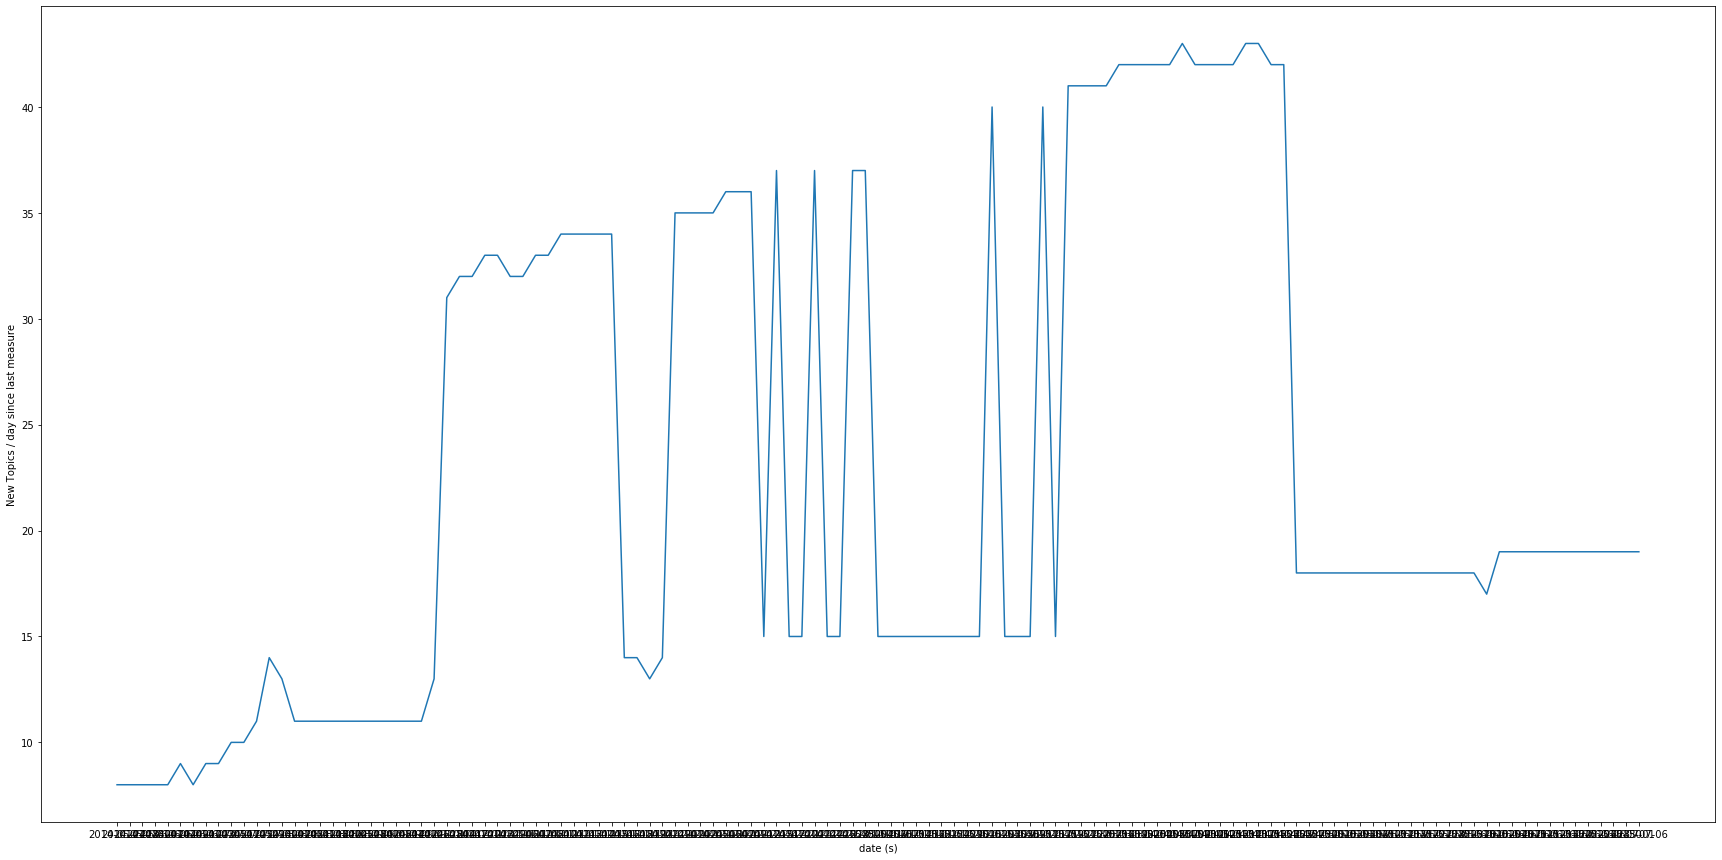

In [72]:
# Show how the number of RECORDED boards varies over time
fig, ax1 = plt.subplots(figsize=(30,15))

ax1.set_xlabel('date (s)')
ax1.set_ylabel('New Topics / day since last measure')
ax1.plot(nPages_df[nPages_df['board'] == ('General Category', 'Security Discussion')]['date'],
         nPages_df[nPages_df['board'] == ('General Category', 'Security Discussion')]['nPages'])

plt.show()

In [73]:
import seaborn as sns
import plotly.express as px
import descartes

In [74]:
nPages_df.groupby(by='date').describe()

nPages                                                          \
            count        mean         std  min   25%   50%    75%     max   
date                                                                        
2014-01-02    8.0    1.250000    0.707107  1.0  1.00   1.0   1.00     3.0   
2014-01-09    8.0    1.625000    1.407886  1.0  1.00   1.0   1.25     5.0   
2014-01-16   10.0    1.600000    1.577621  1.0  1.00   1.0   1.00     6.0   
2014-01-26   11.0    1.909091    2.211540  1.0  1.00   1.0   1.00     8.0   
2014-02-03   11.0    2.000000    2.489980  1.0  1.00   1.0   1.00     9.0   
...           ...         ...         ...  ...   ...   ...    ...     ...   
2015-06-26   16.0   48.375000   72.487125  1.0  2.00   8.5  80.75   231.0   
2015-06-28   15.0   84.933333  165.570644  1.0  4.00   9.0  86.00   626.0   
2015-06-30   16.0  102.875000  248.300591  1.0  2.75   8.5  81.00   997.0   
2015-07-01   16.0  111.125000  279.172080  1.0  3.00   8.5  80.75  1125.0   
2015-07-06    8.0   56.000000   79.735276  1.0  6.25  16.5  81.75   232.0   

           nTopics_est                                                         \
                 count         mean           std   min    25%    50%     75%   
date                                                                            
2014-01-02         8.0    37.500000     35.355339  25.0   25.0   25.0    25.0   
2014-01-09         8.0    56.250000     70.394298  25.0   25.0   25.0    37.5   
2014-01-16        10.0    55.000000     78.881064  25.0   25.0   25.0    25.0   
2014-01-26        11.0    70.454545    110.576999  25.0   25.0   25.0    25.0   
2014-02-03        11.0    75.000000    124.498996  25.0   25.0   25.0    25.0   
...                ...          ...           ...   ...    ...    ...     ...   
2015-06-26        16.0  2393.750000   3624.356265  25.0   75.0  400.0  4012.5   
2015-06-28        15.0  4221.666667   8278.532191  25.0  175.0  425.0  4275.0   
2015-06-30        16.0  5118.750000  12415.029534  25.0  112.5  400.0  4025.0   
2015-07-01        16.0  5531.250000  13958.603977  25.0  125.0  400.0  4012.5   
2015-07-06         8.0  2775.000000   3986.763815  25.0  287.5  800.0  4062.5   

                     
                max  
date                 
2014-01-02    125.0  
2014-01-09    225.0  
2014-01-16    275.0  
2014-01-26    375.0  
2014-02-03    425.0  
...             ...  
2015-06-26  11525.0  
2015-06-28  31275.0  
2015-06-30  49825.0  
2015-07-01  56225.0  
2015-07-06  11575.0  

[142 rows x 16 columns]

In [75]:
nPages_df.reset_index().to_csv('../saved_gen_df/nPages_forum_df.csv', index=None)